In [59]:
#  Import all the modules that we need
#  numpy - math for python
#  scipy - math toolkit, contains least square fitting
#  matplotlib - plotting

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.optimize import curve_fit
import scipy.optimize as opt
%matplotlib inline

In [61]:
# Read in the muon data, save it to a list if 
# it is not a clock timeout

In [62]:
f=open('18-09-20-11-21.data','r')

data=[]
noncoin = []

for line in f.readlines():
    line = line.strip().split()
    dat = float(line[0])
    
    if (dat < 20000):   #clock times greater than 20000 ns are timeouts
        data.append(dat) #and should be ignored
    else:
        noncoin.append(dat)
        
print(len(noncoin))
print(len(data))

1900647
3017


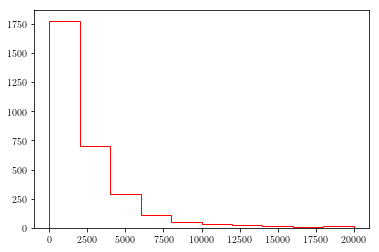

In [63]:
n, bins, _ = plt.hist(data, bins=np.arange(0.0, 21000.0, 2000.0), color='w', edgecolor='r', histtype='step')
#Get the data in histogram form, save the number of events in each bin as the list n,
#bin edges as bins

In [64]:
yerr=[]
xerr=[]
for i in range(len(n)):
    if (n[i] !=0):
        err = np.sqrt(n[i]) #error on the number in the bin from
    else:                   #Poisson statistics
        err=1
    yerr.append(err) 
    xerr.append(100)        #Error determined from clock time measurements

In [65]:
x=np.zeros(len(bins)-1)

for i in range(len(bins)-1):
    x[i]=bins[i]+500   #get the bin centers for plotting

In [66]:
def func(y, a, b,c):
    return a* np.exp(-y/b) + c   #define the fit function, an exponential with a constant term

err = np.asarray(yerr) #make the error an array
time = np.asarray(x)   #"    x         "     "
evts = np.asarray(n)   #" the event rate  "     "
popt, pcov = curve_fit(func, time, evts, sigma = err, p0=[n[0],2117.2,0])  #least squares fit using the fit
# function, our events, and the error on the event rate in each bin
print(evts)
print(err)

[1777.  699.  290.  110.   53.   30.   21.   15.   10.   12.]
[42.15447782 26.43860813 17.02938637 10.48808848  7.28010989  5.47722558
  4.58257569  3.87298335  3.16227766  3.46410162]


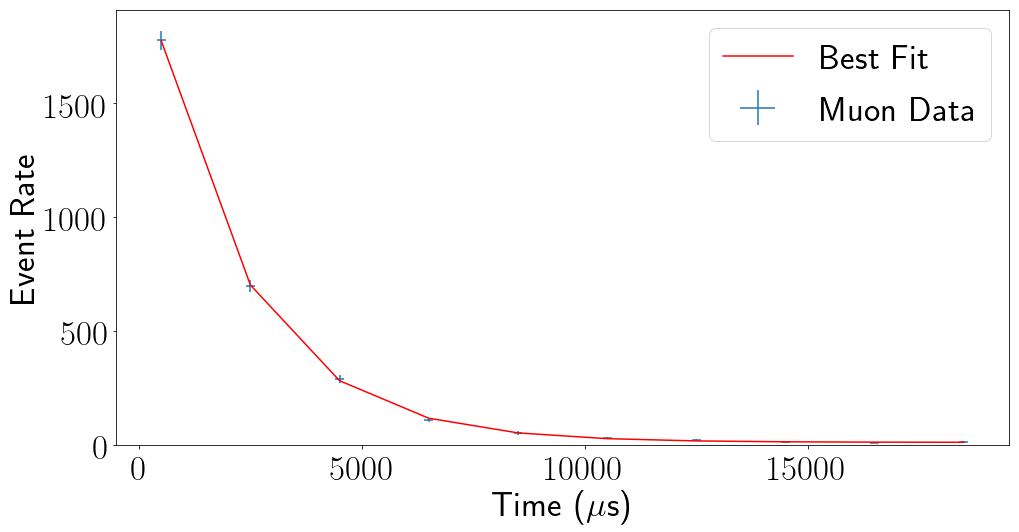

In [67]:
rc('text', usetex=True) #use LaTeX

fig=plt.figure(figsize=(16,8)) #Make the figure big enough

plt.errorbar(x,evts,yerr=yerr,xerr=xerr,linestyle="None",label="Muon Data") #plot the data
plt.plot(x,func(x,*popt),color='r',label="Best Fit") #plot the fit
plt.gca().set_ylim(bottom=0) #make the plot bottom 0.0
plt.xlabel("Time ($\mu$s)",fontsize=35) #label axes
plt.ylabel("Event Rate", fontsize=35)
plt.tick_params(axis='x',labelsize=35)
plt.tick_params(axis='y',labelsize=35)
plt.legend(loc='best',fontsize=35) #add a legend

plt.savefig('example_fit.pdf') #save the figure

In [68]:
print(popt) #Best fit parameters
print(pcov) #Covariance Matrix

[2229.7784272  2134.00113818   11.51569401]
[[ 965.31555513 -569.74348468    4.84701731]
 [-569.74348468  751.8901468   -11.42750938]
 [   4.84701731  -11.42750938    1.00813481]]


In [69]:
lifetime = popt[1] #Get lifetime from our parameters
 
m = 105.658*10**6 # eV
hc = 2*10**(-5) # eV * cm 
c = 3*10**10 #natural units

tauplus = 2196.9803 # micro-seconds, Weber 2011
tauminus = 2043 # micro-seconds, Teach Spin

rho = -(tauplus/tauminus)*((tauminus - lifetime)/(tauplus - lifetime)) #ratio of plus/minus muons

GF = np.sqrt((192 * np.pi**3 * hc)/(lifetime*10**-9 * (m)**5 * c))    #GF/(hbar*c)^3 actually

In [77]:
dT = np.sqrt(pcov[1][1])+lifetime*(np.sqrt(2*(0.001)**2+(0.01)**2)) #uncertainty in lifetime
drho = rho*(dT/lifetime) #uncertainty in ratio
dG = GF*(dT/lifetime) #uncertainty in GF

# Print error contributions in lifetime
print('statistical error:',np.sqrt(pcov[1][1]))
print('systematic error:',dT-np.sqrt(pcov[1][1]))

statistical error: 27.42061536145458
systematic error: 21.552355033548807


In [71]:
# Final summary of observable values and their uncertainties
print('Per our fit, the lifetime is extrapolated as',round(lifetime, 1),'+/-',round(dT,1),' ns')
print('Using our lifetime, G_F =',round(GF*10**23,4),'+/-',round(dG*10**23,2),'x10^-5 GeV^-2')
print('Using our lifetime, rho =',round(rho,4),'+/-',round(drho,2))

Per our fit, the lifetime is extrapolated as 2134.0 +/- 49.0  ns
Using our lifetime, G_F = 1.1884 +/- 0.03 x10^-5 GeV^-2
Using our lifetime, rho = 1.5538 +/- 0.04


In [72]:
# Individual error from the Covariance matrix
print('N0 error =',np.sqrt(pcov[0][0])/popt[0],'%')
print('Lifetime error =',np.sqrt(pcov[1][1])/popt[1],'%')
print('Background error =',np.sqrt(pcov[2][2])/popt[2],'%')

N0 error = 0.013933908131567408 %
Lifetime error = 0.01284939116049526 %
Background error = 0.0871905039730664 %


In [73]:
# Percent error in each observable
print("Lifetime percent error'",dT/lifetime*100,'%')
print("G_F percent error",dG/GF*100,'%')
print("rho percent error",drho/rho*100,'%')

Lifetime percent error' 2.2948896098857334 %
G_F percent error 2.2948896098857334 %
rho percent error 2.2948896098857334 %


In [81]:
# T-test value for G_F (a value less than 2 means that we are in agreement with Webber)
print("Fermi coupling constant t-test",(GF*10**23-1.166378)/(dG*10**23))

Fermi coupling constant t-test 0.8088461771672771


In [87]:
# Correlation calculations for the fit parameters
print('Correlation between background and lifetime:',np.sqrt(pcov[0][2]/popt[0]))

print('Correlation between N0 and lifetime:',-(np.sqrt(abs(pcov[0][1])/popt[0])))

Correlation between background and lifetime: 0.04662366723942044
Correlation between N0 and lifetime: -0.5054856475869236


In [91]:
# Calculating the diagonal^(-1/2) of covariance matrix
diag=np.zeros((3,3))

for i in range(0,3):
    for j in range(0,3):
        if(i != j):
            diag[i][j] = 0
        else:
            diag[i][j] = 1/np.sqrt(pcov[i][j])
print(diag)        

[[0.03218588 0.         0.        ]
 [0.         0.03646891 0.        ]
 [0.         0.         0.99595725]]


In [93]:
# Calculating the correlation matrix
pcorr=np.matmul(diag,np.matmul(pcov,diag))

print(pcorr)

[[ 1.         -0.66875573  0.15537481]
 [-0.66875573  1.         -0.41506402]
 [ 0.15537481 -0.41506402  1.        ]]
